# gapminder dataset

using dplyr

In [8]:
library(gapminder)
library(dplyr)
library(ggplot2)

In [9]:
head(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [10]:
head(gapminder %>%
    mutate(gdp = gdpPercap * pop / 1000000) %>%
        filter(year == 2007) %>%
            arrange(desc(gdp)))

country,continent,year,lifeExp,pop,gdpPercap,gdp
United States,Americas,2007,78.242,301139947,42951.653,12934459
China,Asia,2007,72.961,1318683096,4959.115,6539501
Japan,Asia,2007,82.603,127467972,31656.068,4035135
India,Asia,2007,64.698,1110396331,2452.210,2722925
Germany,Europe,2007,79.406,82400996,32170.374,2650871
United Kingdom,Europe,2007,79.425,60776238,33203.261,2017969


In [16]:
options(repr.plot.width=8, repr.plot.height=6)

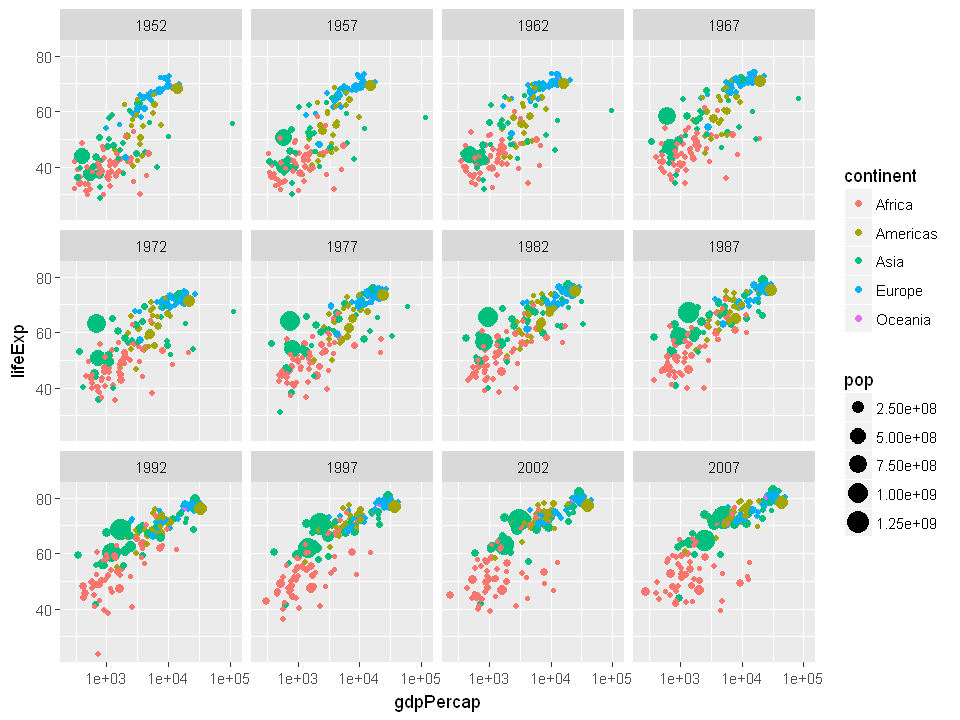

In [17]:
ggplot(gapminder, aes(x = gdpPercap, y = lifeExp, color = continent, size = pop)) +
    geom_point() +
    scale_x_log10() +
    facet_wrap(~ year)

In [13]:
by_continent <- gapminder %>%
    group_by(continent, year) %>%
    summarize(medianGdpPercap = median(gdpPercap))
head(by_continent)

continent,year,medianGdpPercap
Africa,1952,987.0256
Africa,1957,1024.0230
Africa,1962,1133.7837
Africa,1967,1210.3764
Africa,1972,1443.3725
Africa,1977,1399.6388


In [18]:
options(repr.plot.width=6, repr.plot.height=4)

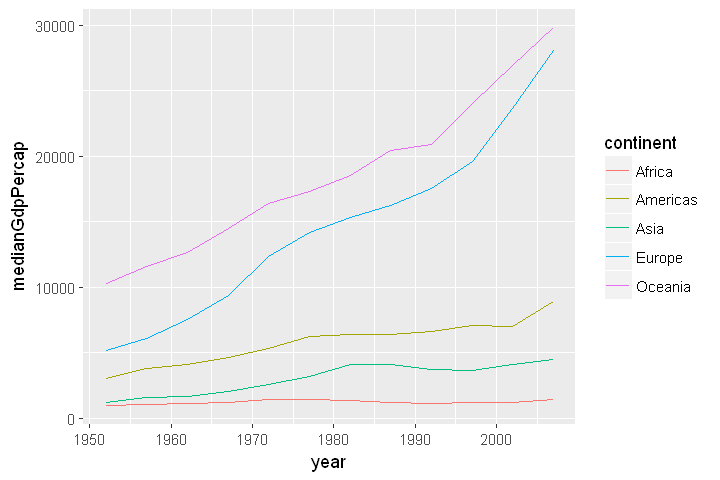

In [19]:
ggplot(by_continent, aes(x = year, y = medianGdpPercap, color = continent)) +
    geom_line()